##### 随机切除小边框

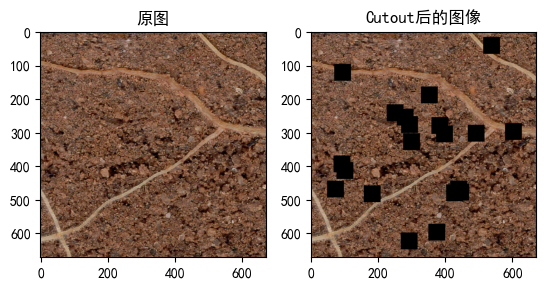

In [2]:
import albumentations as A
import cv2,os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
 
def random_mask(i,o):
    if not os.path.exists(o):
        os.makedirs(o)
    for name in tqdm(os.listdir(i)):
        img_path = os.path.join(i,name)
        save_path = os.path.join(o,name)
        image = cv2.imread(img_path)

        transformed = A.CoarseDropout(max_holes=20,min_holes=10, max_height=100, max_width=100,min_height=30, min_width=35, fill_value=0, p=1)(image=image)
        transformed_image = transformed["image"]
        cv2.imwrite(save_path,transformed_image)

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread(r"D:\31890\Desktop\codefile\Utils\resource\o.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Augment an image
transformed = A.CoarseDropout(max_holes=20, max_height=50, max_width=50, fill_value=0, p=1)(image=image)
transformed_image = transformed["image"]
plt.subplot(1, 2, 1)
plt.title('原图')  # 第一幅图片标题
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Cutout后的图像")
plt.imshow(transformed_image)
plt.show()




##### 随机切除小边框

In [23]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

# Declare an augmentation pipeline
RandomCrop = A.Compose([
    A.RandomCrop(width=412, height=412),
])

Flip = A.Compose([
    A.HorizontalFlip(p=1),
])

Rotate = A.Compose([
    A.Rotate(border_mode=cv2.BORDER_CONSTANT,value=0,mask_value=0,rotate_method='ellipse',p=1)
])

ColorJitter = A.Compose([
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=1),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread(r"D:\31890\Desktop\codefile\Utils\resource\o.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
RandomCrop_img = RandomCrop(image=image)["image"]
Flip_img = Flip(image=image)["image"]
Rotate_img = Rotate(image=image)["image"]
ColorJitter_img = ColorJitter(image=image)["image"]

cv2.imwrite(r"D:\31890\Desktop\codefile\Utils\resource\RandomCrop_img.jpg",RandomCrop_img)
cv2.imwrite(r"D:\31890\Desktop\codefile\Utils\resource\Flip_img.jpg",Flip_img)
cv2.imwrite(r"D:\31890\Desktop\codefile\Utils\resource\Rotate_img.jpg",Rotate_img)
cv2.imwrite(r"D:\31890\Desktop\codefile\Utils\resource\ColorJitter_img.jpg",ColorJitter_img)

# plt.imshow(RandomCrop_img)
# plt.show()
# # plt.savefig()

True